<a href="https://colab.research.google.com/github/vdoddihithlu/MLModels/blob/main/Laptop_Price_Analysis_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import kagglehub

path = kagglehub.dataset_download("sadiajavedd/brand-wise-laptop-price-dataset")
print("Path to dataset files:", path)
files_in_path = os.listdir(path)
print(f"Files in path: {files_in_path}")

100%|██████████| 25.2k/25.2k [00:00<00:00, 25.1MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/sadiajavedd/brand-wise-laptop-price-dataset/versions/1
Files in path: ['laptop_prices (1).csv']


In [3]:
csv_file_path = os.path.join(path, 'laptop_prices (1).csv')
df = pd.read_csv(csv_file_path)

In [4]:
df.sample(5)

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,...,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
531,Toshiba,Satellite Pro,Notebook,15.6,8,Windows 10,2.00,860.0,Full HD,1920,...,No,Intel,2.5,Core i5 7200U,500,0,HDD,No,Intel,HD Graphics 620
471,HP,ZBook 15u,Notebook,15.6,8,Windows 10,1.90,1154.0,Full HD,1920,...,No,Intel,2.5,Core i5 7200U,500,0,HDD,No,AMD,FirePro W4190M
369,HP,Elitebook 1040,Ultrabook,14.0,8,Windows 10,1.36,1750.0,Full HD,1920,...,No,Intel,2.7,Core i7 7500U,256,0,SSD,No,Intel,HD Graphics 620
502,Lenovo,Yoga 920-13IKB,2 in 1 Convertible,13.9,8,Windows 10,1.40,1599.0,Full HD,1920,...,No,Intel,1.6,Core i5 8250U,256,0,SSD,No,Intel,UHD Graphics 620
584,Dell,Chromebook 11,Netbook,11.6,4,Chrome OS,1.26,295.0,Standard,1366,...,No,Intel,1.6,Celeron Dual Core N3060,16,0,Flash Storage,No,Intel,HD Graphics 400


**EDA**

In [5]:
df.columns

Index(['Company', 'Product', 'TypeName', 'Inches', 'Ram', 'OS', 'Weight',
       'Price_euros', 'Screen', 'ScreenW', 'ScreenH', 'Touchscreen',
       'IPSpanel', 'RetinaDisplay', 'CPU_company', 'CPU_freq', 'CPU_model',
       'PrimaryStorage', 'SecondaryStorage', 'PrimaryStorageType',
       'SecondaryStorageType', 'GPU_company', 'GPU_model'],
      dtype='object')

In [6]:
df.isnull().sum()

,0
Company,0
Product,0
TypeName,0
Inches,0
Ram,0
OS,0
Weight,0
Price_euros,0
Screen,0
ScreenW,0


In [7]:
df.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Company,1275,19,Dell,291,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product,1275,618,XPS 13,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TypeName,1275,6,Notebook,707,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Inches,1275.0,NaN,NaN,NaN,15.022902,1.42947,10.1,14.0,15.6,15.6,18.4
Ram,1275.0,NaN,NaN,NaN,8.440784,5.097809,2.0,4.0,8.0,8.0,64.0
OS,1275,9,Windows 10,1048,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Weight,1275.0,NaN,NaN,NaN,2.040525,0.669196,0.69,1.5,2.04,2.31,4.7
Price_euros,1275.0,NaN,NaN,NaN,1134.969059,700.752504,174.0,609.0,989.0,1496.5,6099.0
Screen,1275,4,Full HD,835,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ScreenW,1275.0,NaN,NaN,NaN,1900.043922,493.346186,1366.0,1920.0,1920.0,1920.0,3840.0


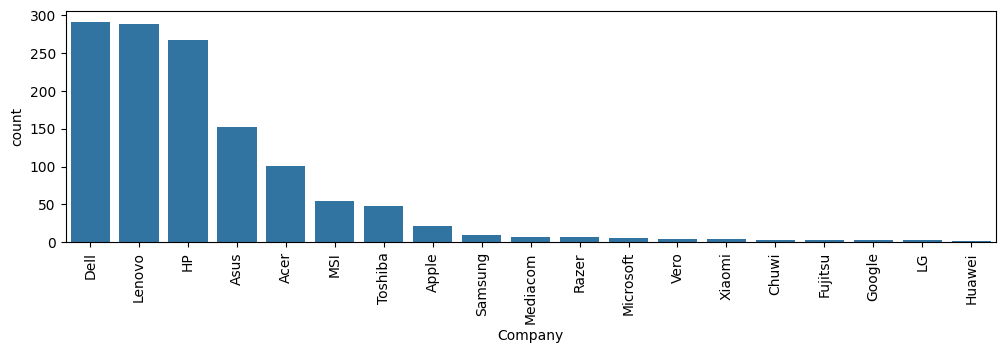

In [8]:
plt.figure(figsize=(12, 3))
sns.countplot(x='Company', data=df ,order=df['Company'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

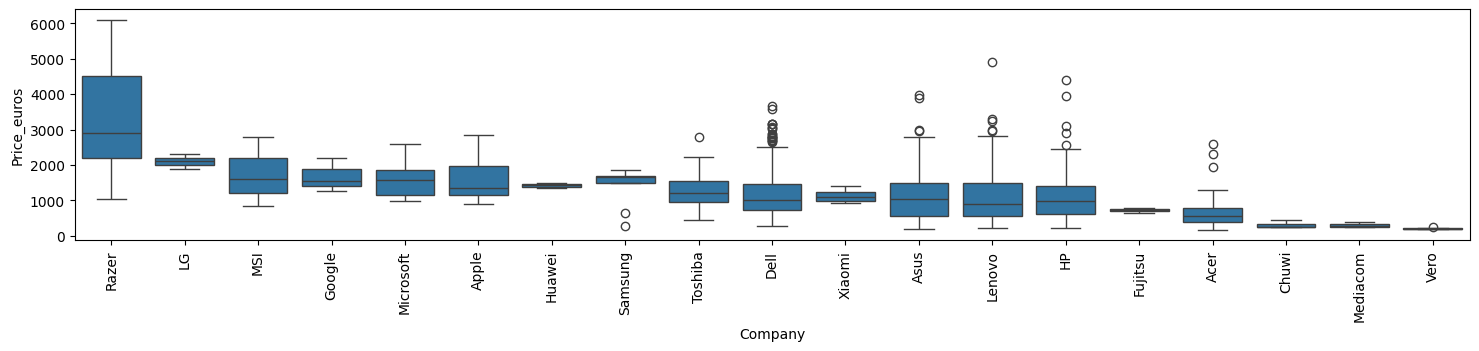

In [9]:
plt.figure(figsize=(18, 3))
ord=df.groupby('Company')['Price_euros'].mean().sort_values(ascending=False).index
sns.boxplot(x='Company', y='Price_euros', data=df, order=ord)
plt.xticks(rotation=90)
plt.show()

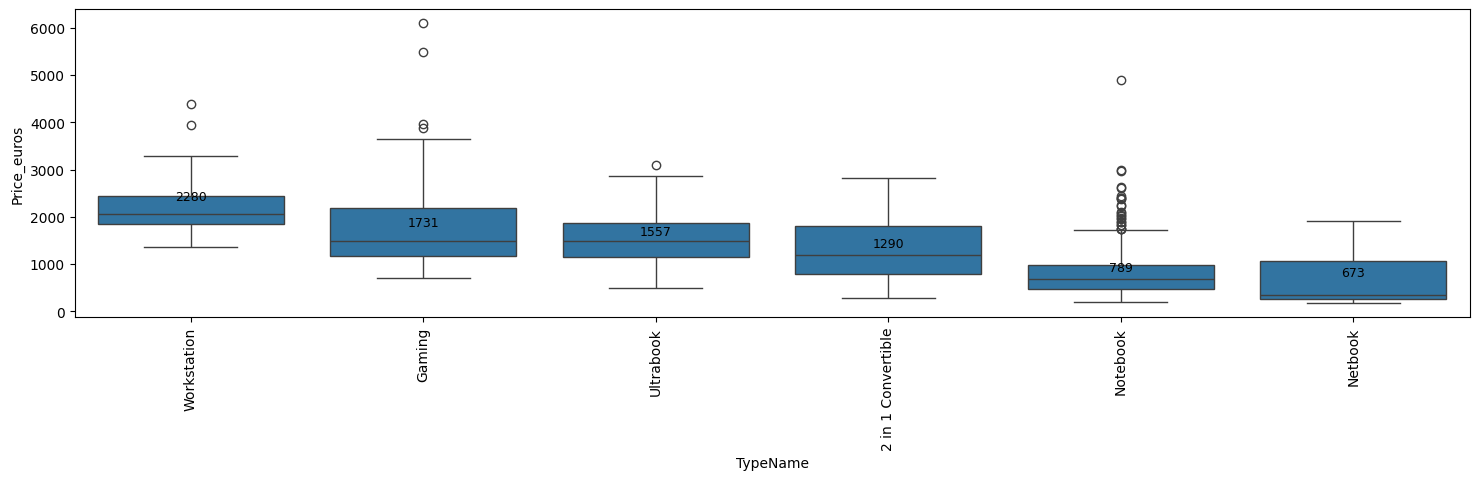

In [10]:
plt.figure(figsize=(18, 4))
ord=df.groupby('TypeName')['Price_euros'].mean().sort_values(ascending=False).index
sns.boxplot(x='TypeName', y='Price_euros', data=df, order=ord)

# Calculate mean prices for annotation
mean_prices = df.groupby('TypeName')['Price_euros'].mean().loc[ord]

# Add text annotations for mean prices
for i, company in enumerate(ord):
    plt.text(i, mean_prices.loc[company], f'{mean_prices.loc[company]:.0f}',
             ha='center', va='bottom', color='black', fontsize=9)

plt.xticks(rotation=90)
plt.show()

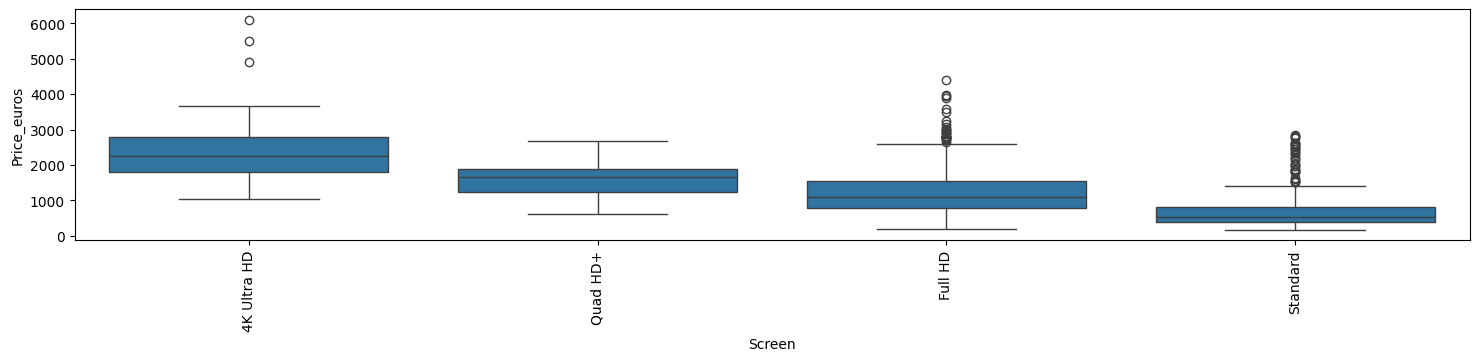

In [11]:
plt.figure(figsize=(18, 3))
ord=df.groupby('Screen')['Price_euros'].mean().sort_values(ascending=False).index
sns.boxplot(x='Screen', y='Price_euros', data=df, order=ord)
plt.xticks(rotation=90)
plt.show()

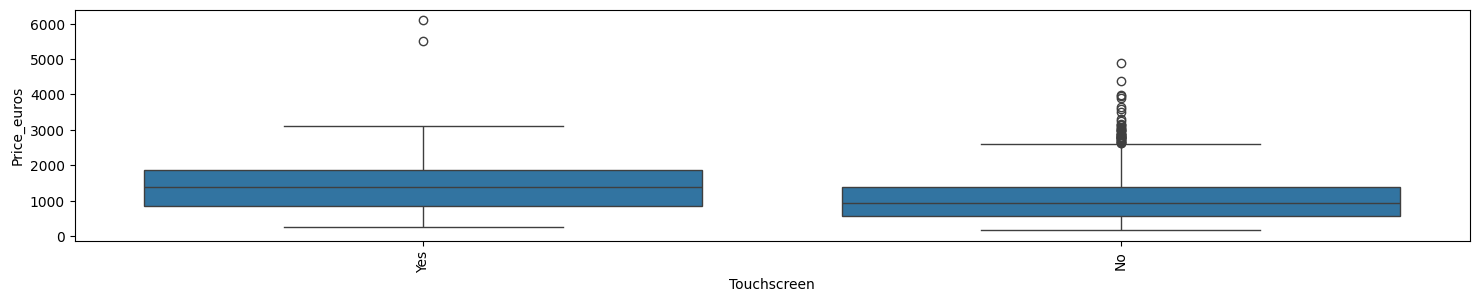

In [12]:
plt.figure(figsize=(18, 3))
ord=df.groupby('Touchscreen')['Price_euros'].mean().sort_values(ascending=False).index
sns.boxplot(x='Touchscreen', y='Price_euros', data=df, order=ord)
plt.xticks(rotation=90)
plt.show()

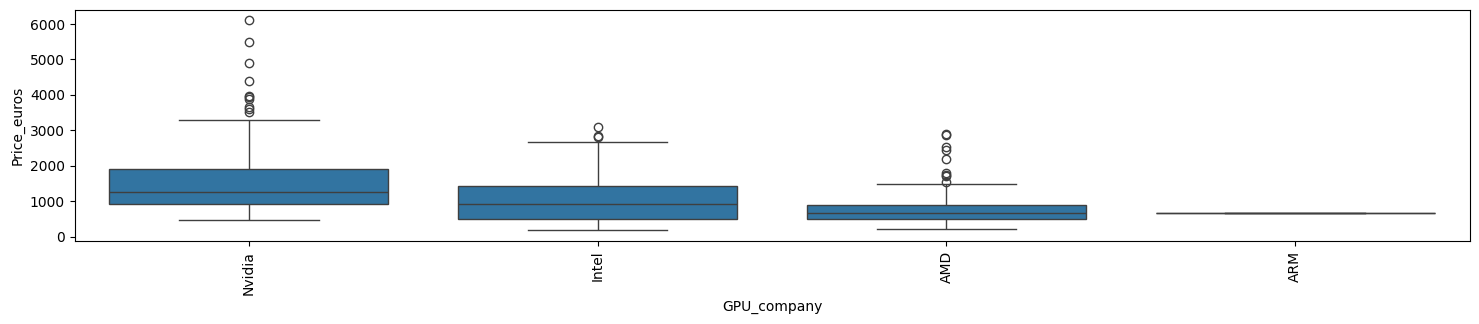

In [13]:
plt.figure(figsize=(18, 3))
ord=df.groupby('GPU_company')['Price_euros'].mean().sort_values(ascending=False).index
sns.boxplot(x='GPU_company', y='Price_euros', data=df, order=ord)
plt.xticks(rotation=90)
plt.show()

In [14]:
df.groupby('PrimaryStorageType')[['PrimaryStorage','Price_euros']].agg(['mean', 'min', 'max'])

PrimaryStorage             Price_euros                 
                             mean  min   max         mean     min      max
PrimaryStorageType                                                        
Flash Storage           80.901408   16   512   544.994648  191.90  2139.97
HDD                    883.387187   32  2048   658.401226  224.00  2899.00
Hybrid                 959.500000  508  1024   875.935000  549.99  1099.00
SSD                    282.203106    8  1024  1391.896547  174.00  6099.00

In [15]:
df.groupby('SecondaryStorageType')[['SecondaryStorage','Price_euros']].agg(['mean', 'min', 'max'])


SecondaryStorage              Price_euros           \
                                 mean   min   max         mean      min   
SecondaryStorageType                                                      
HDD                       1094.851485   500  2048  1610.424455   499.00   
Hybrid                    1024.000000  1024  1024  2994.995000  2749.99   
No                           0.000000     0     0  1040.399119   174.00   
SSD                        320.000000   256   512  1420.990000  1279.00   

                               
                          max  
SecondaryStorageType           
HDD                   3890.00  
Hybrid                3240.00  
No                    6099.00  
SSD                   1607.96

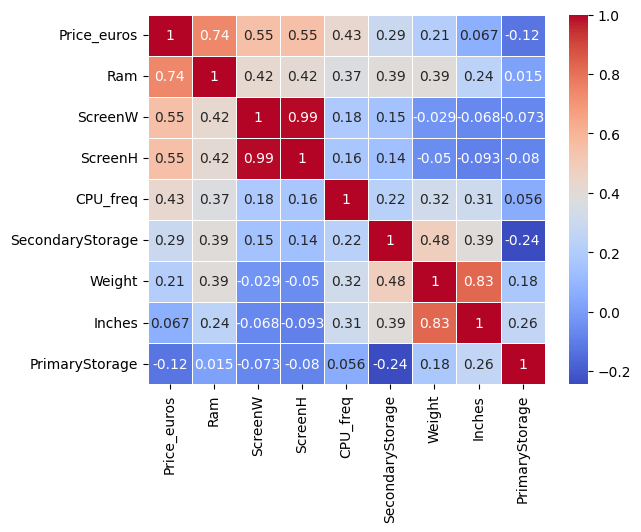

In [16]:
corr_matrix = df.select_dtypes(include=np.number).corr()
sorted_order = corr_matrix['Price_euros'].sort_values(ascending=False).index
sns.heatmap(corr_matrix.loc[sorted_order, sorted_order], cmap='coolwarm', annot=True, linewidths=0.5)
plt.show()

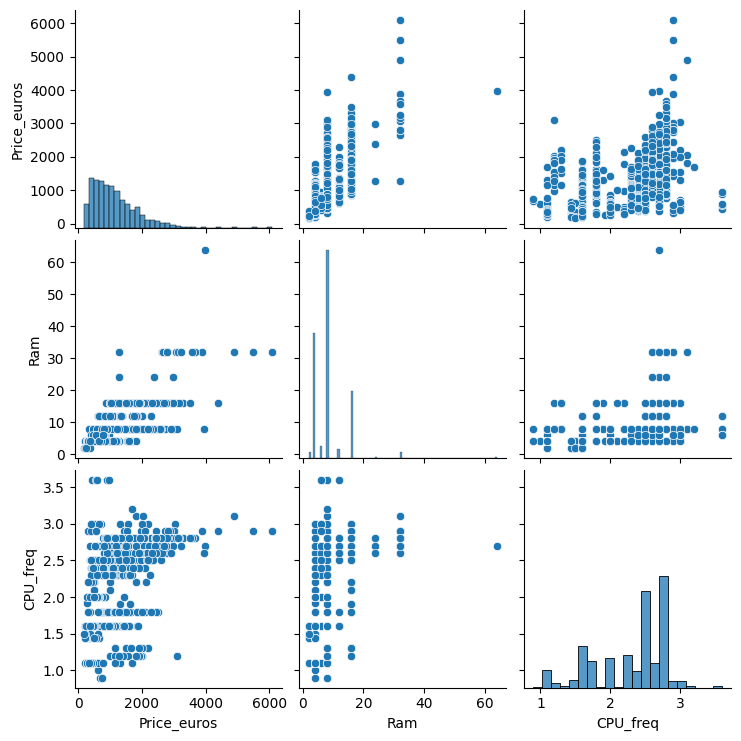

In [17]:
sns.pairplot(df[['Price_euros','Ram','CPU_freq']])

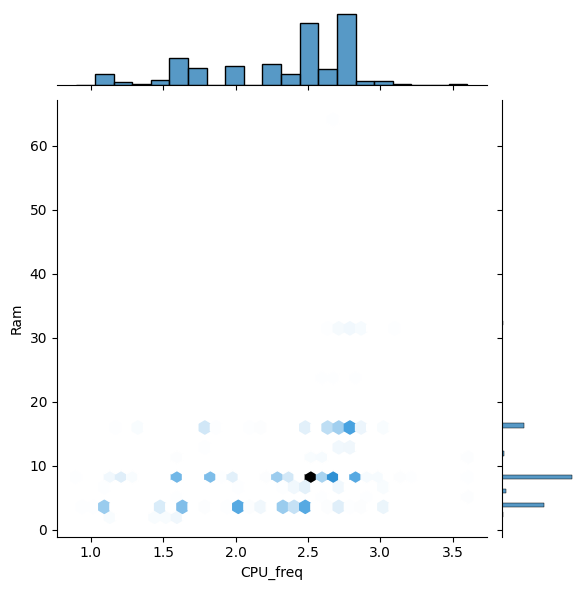

In [18]:
sns.jointplot(x='CPU_freq', y='Ram', data=df, kind='hex')
plt.show()

<Axes: xlabel='Price_euros', ylabel='Ram'>

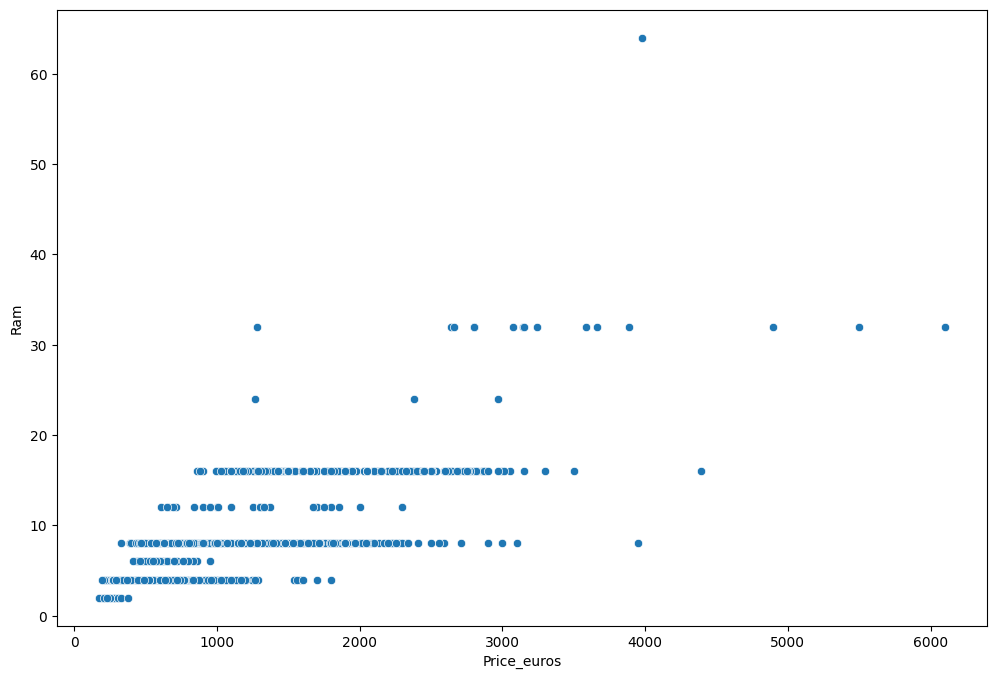

In [19]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Price_euros',y='Ram',data=df)

**Data Preparation**

In [69]:
df2 = df[['Company',  'Inches', 'Ram', 'Weight',
       'Price_euros', 'Screen', 'Touchscreen',
        'RetinaDisplay', 'CPU_company', 'CPU_freq',
       'PrimaryStorage', 'SecondaryStorage', 'PrimaryStorageType',
       'SecondaryStorageType', 'GPU_company']]
       #'Product', 'TypeName',, 'OS', 'ScreenW', 'ScreenH' 'IPSpanel','CPU_model',, 'GPU_model'

In [70]:
df2.sample(3)

,Company,Inches,Ram,Weight,Price_euros,Screen,Touchscreen,RetinaDisplay,CPU_company,CPU_freq,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company
1040,Lenovo,15.6,4,1.80,847.00,Full HD,Yes,No,Intel,2.5,256,0,SSD,No,Intel
473,Dell,13.3,8,1.42,1841.85,Full HD,Yes,No,Intel,1.6,256,0,SSD,No,Intel
229,HP,15.6,8,1.90,1269.00,Full HD,No,No,Intel,2.7,1024,0,HDD,No,AMD


In [71]:
# Create dummy variables for PrimaryStorageType, and store storage size.
df_processed = df2.copy()
Primary_storage_type_dummies = pd.get_dummies(df_processed['PrimaryStorageType'], prefix='PrimaryStorage')
for col in Primary_storage_type_dummies.columns:
    df_processed[col] = Primary_storage_type_dummies[col] * df_processed['PrimaryStorage']

# Create dummy variables for PrimaryStorageType, and store storage size.
Secondary_storage_type_dummies = pd.get_dummies(df_processed['SecondaryStorageType'], prefix='SecondaryStorage')
for col in Secondary_storage_type_dummies.columns:
    df_processed[col] = Secondary_storage_type_dummies[col] * df_processed['SecondaryStorage']

#df_processed = df_processed.drop(columns=['PrimaryStorage', 'PrimaryStorageType','SecondaryStorage','SecondaryStorageType','SecondaryStorage_No'])

In [72]:
#df_processed.iloc[:,10:].sample(3)
#df_processed[df_processed['SecondaryStorageType'] != 'No'].iloc[:,10:].sample(3)
df_processed.sample(3)

,Company,Inches,Ram,Weight,Price_euros,Screen,Touchscreen,RetinaDisplay,CPU_company,CPU_freq,...,SecondaryStorageType,GPU_company,PrimaryStorage_Flash Storage,PrimaryStorage_HDD,PrimaryStorage_Hybrid,PrimaryStorage_SSD,SecondaryStorage_HDD,SecondaryStorage_Hybrid,SecondaryStorage_No,SecondaryStorage_SSD
804,Dell,11.6,4,1.63,744.0,Standard,No,No,Intel,1.1,...,No,Intel,0,0,0,128,0,0,0,0
1115,Dell,13.3,8,1.23,1379.0,Full HD,No,No,Intel,2.4,...,No,Intel,0,0,0,256,0,0,0,0
453,Lenovo,14.0,8,1.65,1345.0,Full HD,No,No,Intel,2.5,...,No,Intel,0,0,0,256,0,0,0,0


In [73]:
df_processed = df_processed.drop(columns=['PrimaryStorage', 'PrimaryStorageType','SecondaryStorage','SecondaryStorageType','SecondaryStorage_No'])

In [75]:
df_processed['RetinaDisplay'] = df_processed['RetinaDisplay'].map({'Yes': True, 'No': False})
df_processed['Touchscreen'] = df_processed['Touchscreen'].map({'Yes': True, 'No': False})
df3 = pd.get_dummies(df_processed, columns=['Company','Screen','CPU_company','GPU_company'], drop_first=True)

In [76]:
df3.head()

,Inches,Ram,Weight,Price_euros,Touchscreen,RetinaDisplay,CPU_freq,PrimaryStorage_Flash Storage,PrimaryStorage_HDD,PrimaryStorage_Hybrid,...,Company_Vero,Company_Xiaomi,Screen_Full HD,Screen_Quad HD+,Screen_Standard,CPU_company_Intel,CPU_company_Samsung,GPU_company_ARM,GPU_company_Intel,GPU_company_Nvidia
0,13.3,8,1.37,1339.69,False,True,2.3,0,0,0,...,False,False,False,False,True,True,False,False,True,False
1,13.3,8,1.34,898.94,False,False,1.8,128,0,0,...,False,False,False,False,True,True,False,False,True,False
2,15.6,8,1.86,575.00,False,False,2.5,0,0,0,...,False,False,True,False,False,True,False,False,True,False
3,15.4,16,1.83,2537.45,False,True,2.7,0,0,0,...,False,False,False,False,True,True,False,False,False,False
4,13.3,8,1.37,1803.60,False,True,3.1,0,0,0,...,False,False,False,False,True,True,False,False,True,False


**Model**

In [81]:
from sklearn.model_selection import train_test_split
X = df3.drop(columns=['Price_euros'])
y = df3['Price_euros']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=101)

In [82]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [86]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1020, 39), (255, 39), (1020,), (255,))

In [129]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.optimizers import Adam

In [130]:
model = Sequential()

model.add(Dense (39, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense (20, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense (10, activation='relu'))
model.add(Dense (1))

model.compile(optimizer='rmsprop', loss='mse')

# For a multi-class classification problem
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# For a binary classification problem
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# For a mean squared error regression problem
model.compile(optimizer='rmsprop',
              loss='mse')

In [132]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [133]:
model.fit(x=X_train, y=y_train.values
          , validation_data=(X_test, y_test.values)
          ,callbacks=[early_stop]
          , epochs=500)

Epoch 1/500
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 1762436.2500 - val_loss: 1875306.7500
Epoch 2/500
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1800960.5000 - val_loss: 1865358.6250
Epoch 3/500
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1676934.3750 - val_loss: 1835710.7500
Epoch 4/500
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1700740.7500 - val_loss: 1757599.0000
Epoch 5/500
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1602929.0000 - val_loss: 1586158.2500
Epoch 6/500
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1381720.0000 - val_loss: 1284840.3750
Epoch 7/500
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1072530.7500 - val_loss: 868958.5000
Epoch 8/500
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 720127.1250 - val_loss: 489233.5000
Epoch 9/500
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 430281.0625 - val_loss: 283140.7188
Epoch 10/500
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 310687.0000 - val_loss: 208486.4219
Epoch 11/500
32/32 ━━━━━━━━━━━━━━━━━

<Axes: >

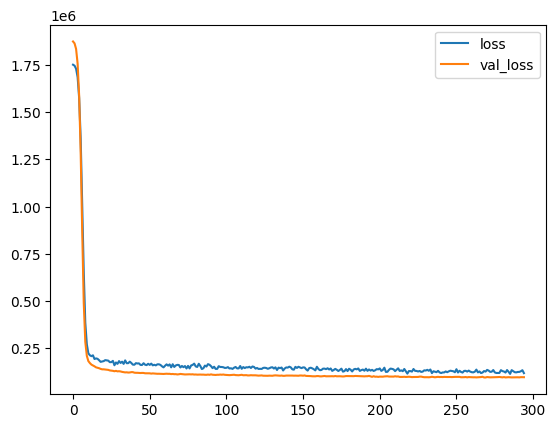

In [134]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [127]:
from tensorflow.keras.models import load_model
model.save('my_model.keras')

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


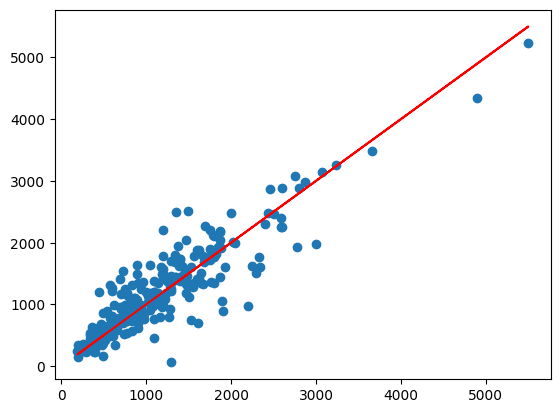

In [118]:
predictions = model.predict(X_test)
plt.scatter(y_test,predictions)
plt.plot(y_test,y_test,'r')

In [108]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,explained_variance_score
print(mean_absolute_error(predictions,y_test))
print(np.sqrt(mean_squared_error(predictions,y_test)))
print(explained_variance_score(predictions,y_test))

227.97008995744292
328.13679493129723
0.7946037068757116


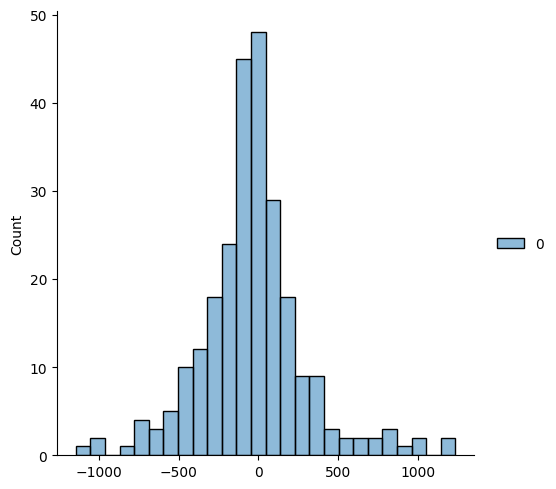

In [125]:
y_test.shape
errors = y_test.values.reshape(255, 1) - predictions
sns.displot(errors)

In [115]:
print("Features correlated with Price_euros (sorted descending):")
print(corr_matrix['Price_euros'].sort_values(ascending=False))

Features correlated with Price_euros (sorted descending):
Price_euros         1.000000
Ram                 0.740287
ScreenW             0.552491
ScreenH             0.548529
CPU_freq            0.428847
SecondaryStorage    0.291207
Weight              0.211883
Inches              0.066608
PrimaryStorage     -0.124775
Name: Price_euros, dtype: float64


**Test random model**

In [175]:
newdf = df[['Price_euros', 'Ram', 'Touchscreen', 'PrimaryStorageType']]
newdf['Touchscreen']= newdf['Touchscreen'].map({'Yes':True, 'No':False})
#newdf['IPSpanel']= newdf['IPSpanel'].map({'Yes':True, 'No':False})
#newdf['RetinaDisplay']= newdf['RetinaDisplay'].map({'Yes':True, 'No':False})
newdf = pd.get_dummies(newdf, columns = ['PrimaryStorageType'] ,drop_first=True)
#df3 = pd.get_dummies(df_processed, columns=['Company','Screen','CPU_company','GPU_company'], drop_first=True)
newdf.sample(3)

/tmp/ipython-input-3911502859.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf['Touchscreen']= newdf['Touchscreen'].map({'Yes':True, 'No':False})


,Price_euros,Ram,Touchscreen,PrimaryStorageType_HDD,PrimaryStorageType_Hybrid,PrimaryStorageType_SSD
282,829.00,8,False,False,False,True
738,2094.48,16,False,False,False,True
643,1169.00,8,False,True,False,False


In [176]:
X = newdf.drop(columns=['Price_euros'])
y = newdf['Price_euros']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1020, 5), (255, 5), (1020,), (255,))

In [177]:
X_train.sample()

,Ram,Touchscreen,PrimaryStorageType_HDD,PrimaryStorageType_Hybrid,PrimaryStorageType_SSD
546,4,False,True,False,False


In [178]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [183]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout

model = Sequential()

model.add(Dense(3,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [186]:
model.fit(x=X_train,y=y_train.values,validation_data=(X_test,y_test.values),epochs=500)


Epoch 1/500
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1691156.6250 - val_loss: 1786627.0000
Epoch 2/500
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1752743.5000 - val_loss: 1785114.8750
Epoch 3/500
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1562501.3750 - val_loss: 1783639.6250
Epoch 4/500
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1530104.1250 - val_loss: 1782122.1250
Epoch 5/500
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1774899.6250 - val_loss: 1780580.1250
Epoch 6/500
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1722607.2500 - val_loss: 1779073.8750
Epoch 7/500
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1681935.5000 - val_loss: 1777519.5000
Epoch 8/500
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1587450.0000 - val_loss: 1775967.3750
Epoch 9/500
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1708170.3750 - val_loss: 1774411.6250
Epoch 10/500
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1735566.6250 - val_loss: 1772852.0000
Epoch 11/500
32/32 ━━━━━━━━━━

<Axes: >

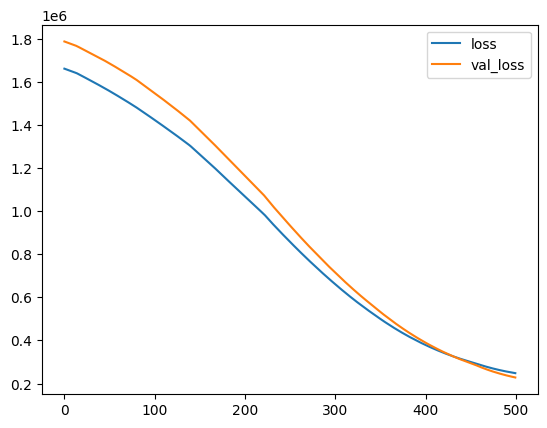

In [187]:
losses = pd.DataFrame( model.history.history)
losses.plot()

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


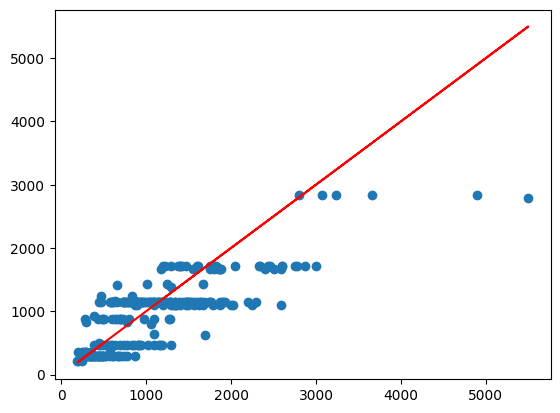

In [188]:
pred = model.predict(X_test)
plt.scatter(y_test,pred)
plt.plot(y_test,y_test,'r')
